# <center>Laboratorium 9<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
fcn = lambda x: np.sign(x)*x + x**2
frj = lambda x: np.sign(x) * (x**2)
frt = lambda x: np.power(np.abs(np.sin(5*x)), 3)
fa_1 = lambda x: 1/(1 + x**2)
fa_25 = lambda x: 1/(1 + 25*x**2)
fa_100 = lambda x: 1/(1 + 100*x**2)
fn = lambda x: np.sign(x)


***Zadanie 3.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

***Zadanie 4.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

In [3]:
# from scipy.interpolate import barycentric_interpolate

# # funkcja do interpolacji
# f = lambda x: np.cos(x)+x**2

# # wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
# x = np.linspace(-1,1,1000)

# # węzły Czebyszewa 
# interpolation_nodes_number = 1e1
# xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# # interpoalcja metodą barycentryczną
# yimp = barycentric_interpolate(xch,f(xch),x)

# plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
# plt.plot(x,yimp,'r',label = 'interpolacja')
# plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc = 0)
# plt.grid()
# plt.show()

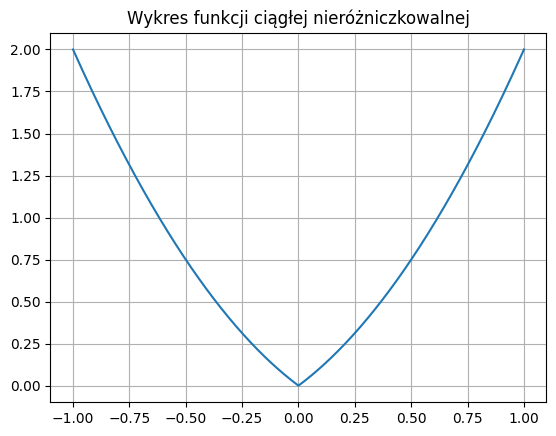

In [4]:
# Wykres dla funkcji ciągłej nieróżniczkowalnej 
x = np.linspace(-1,1,1000)
y = fcn(x)

plt.plot(x, y)
plt.title('Wykres funkcji ciągłej nieróżniczkowalnej')
plt.grid()
plt.show()


d:\Studia\Semestr_3\MN\laboratorium-9-Geq0nek\main.py:69: RuntimeWarning: divide by zero encountered in divide
  L = wi/(x - xi)
d:\Studia\Semestr_3\MN\laboratorium-9-Geq0nek\main.py:70: RuntimeWarning: invalid value encountered in scalar divide
  Y.append(yi @ L / sum(L))


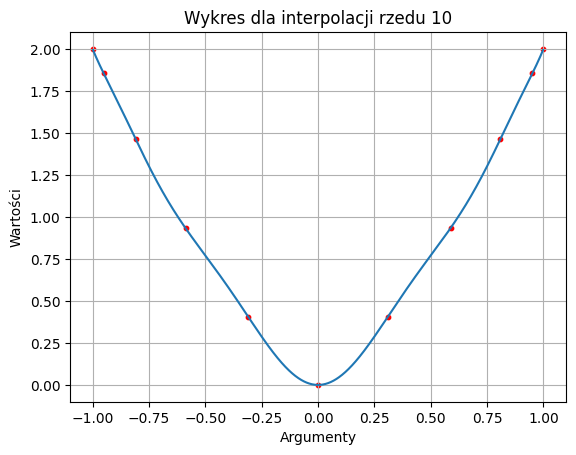

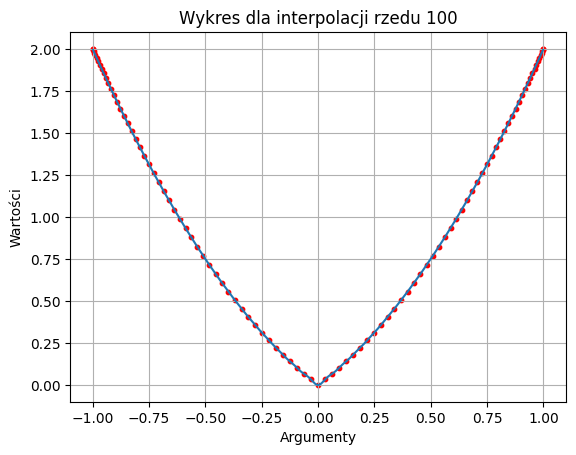

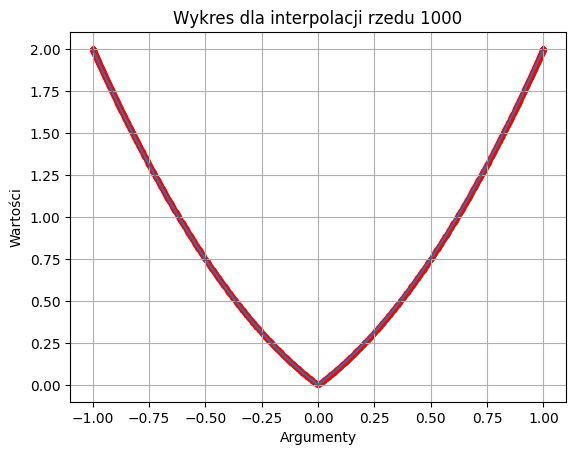

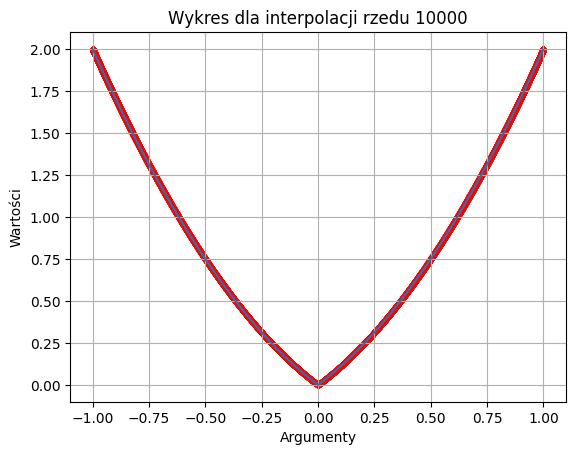

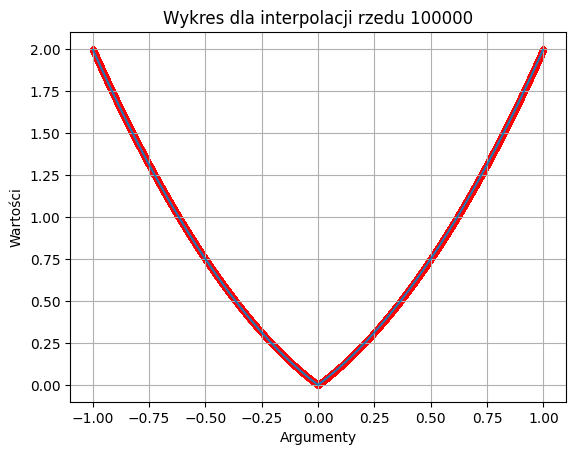

In [5]:
n_values = [10, 100, 1000, 10000, 100000]
x = np.linspace(-1,1,1000)

# Interpolacja dla funkcji stworzonej samodzielnie 
for n in n_values:
    node = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = fcn(x_node)

    W = main.barycentric_inte(x_node, y_node, node, x)
    #Sposób interpolacji dla funkcji wbudowanej
    #W_2 = scipy.interpolate.barycentric_interpolate(x_node, y_node, x)

    plt.plot(x, W)
    plt.scatter(x_node, y_node, s=10, c="r")
    plt.xlabel("Argumenty")
    plt.ylabel("Wartości")
    plt.title(f"Wykres dla interpolacji rzedu {n}")
    plt.grid()
    plt.show()


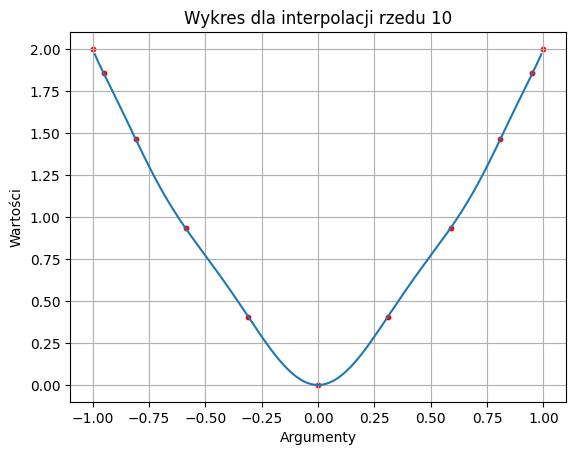

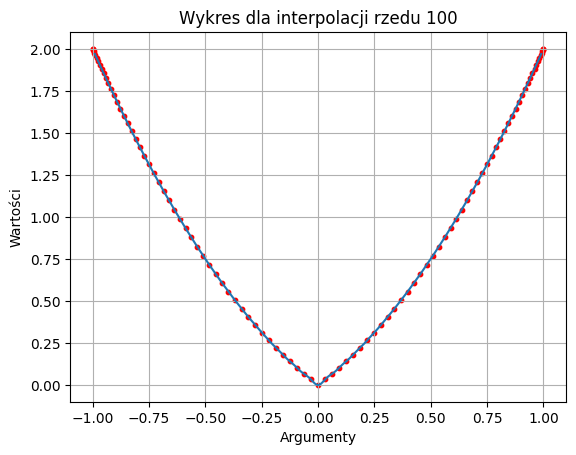

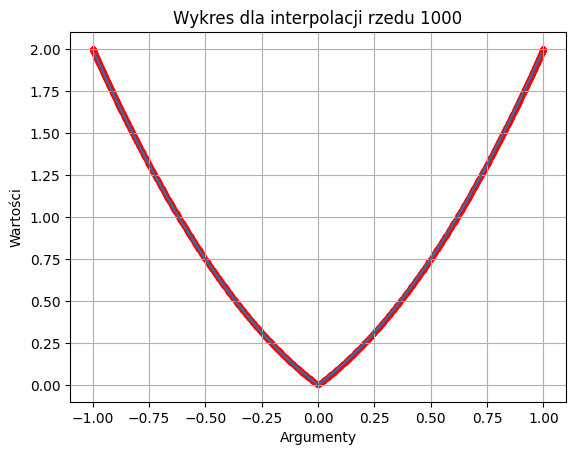

In [15]:
#Sposób interpolacji dla funkcji wbudowanej
n_values = [10, 100, 1000, 10000, 100000]
x = np.linspace(-1,1,1000)
for n in n_values:
    node = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = fcn(x_node)

    # W = main.barycentric_inte(x_node, y_node, node, x)
    W = scipy.interpolate.barycentric_interpolate(x_node, y_node, x)

    plt.plot(x, W)
    plt.scatter(x_node, y_node, s=10, c="r")
    plt.xlabel("Argumenty")
    plt.ylabel("Wartości")
    plt.title(f"Wykres dla interpolacji rzedu {n}")
    plt.grid()
    plt.show()

In [6]:
%%timeit -n 1 -r 1
node = main.bar_czeb_weights(10)
x_node = main.chebyshev_nodes(10)
y_node = fcn(x_node)
W = main.barycentric_inte(x_node, y_node, node, x)

5.78 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n 1 -r 1
node = main.bar_czeb_weights(100)
x_node = main.chebyshev_nodes(100)
y_node = fcn(x_node)
W = main.barycentric_inte(x_node, y_node, node, x)

14.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
node = main.bar_czeb_weights(1000)
x_node = main.chebyshev_nodes(1000)
y_node = fcn(x_node)
W = main.barycentric_inte(x_node, y_node, node, x)

118 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%%timeit -n 1 -r 1
node = main.bar_czeb_weights(10000)
x_node = main.chebyshev_nodes(10000)
y_node = fcn(x_node)
W = main.barycentric_inte(x_node, y_node, node, x)

1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
%%timeit -n 1 -r 1
node = main.bar_czeb_weights(100000)
x_node = main.chebyshev_nodes(100000)
y_node = fcn(x_node)
W = main.barycentric_inte(x_node, y_node, node, x)

10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

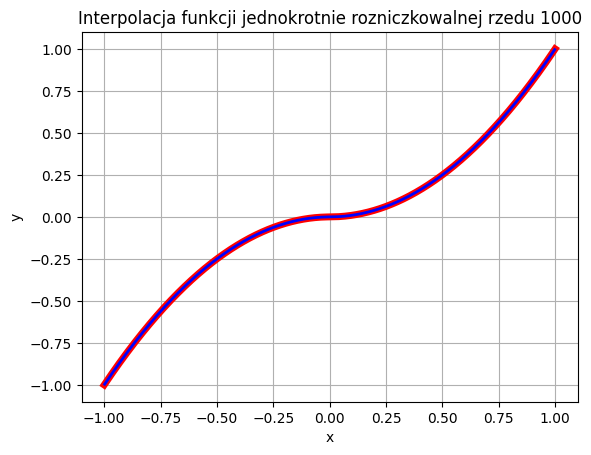

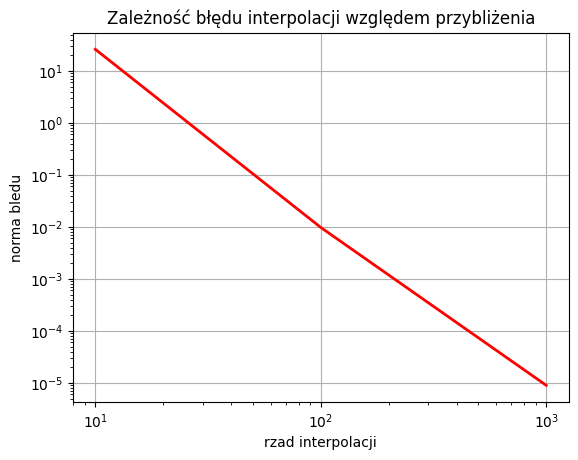

In [11]:
x = np.linspace(-1, 1, 1000)
y = frj(x)
norm = []
n_values = [10, 100, 1000]
err_func = []
v = 2.102e4

for n in n_values:
    node = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = frj(x_node)
    W = main.barycentric_inte(x_node, y_node, node, x)
    norm.append(main.L_inf(y, W))
    err_func.append(4 * v / 3 / np.pi / (n - 3)**3)

plt.plot(x, y, linewidth = 5, color = "r")
plt.plot(x, W, linewidth = 2, color = "b")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja funkcji jednokrotnie rozniczkowalnej rzedu 1000")
plt.show()

plt.plot(n_values, err_func, linewidth = 2, color = "r")
plt.scatter(n_values, norm)
plt.grid()
plt.xlabel("rzad interpolacji")
plt.ylabel("norma bledu")
plt.xscale("log")
plt.yscale("log")
plt.title("Zależność błędu interpolacji względem przybliżenia")
plt.show()

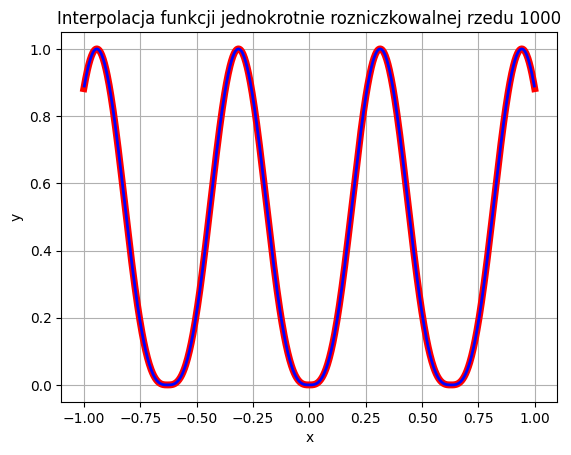

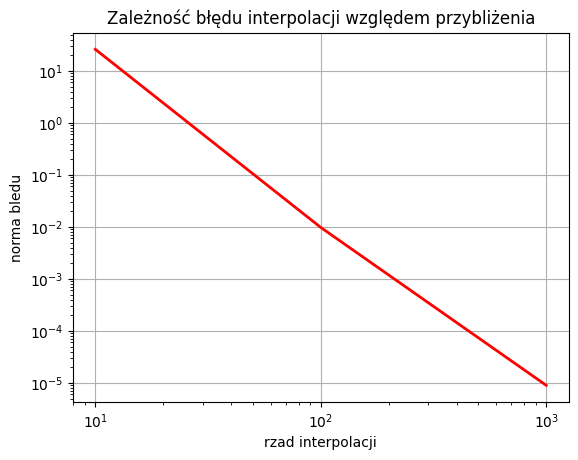

In [12]:
x = np.linspace(-1, 1, 1000)
y = frt(x)
norm = []
n_values = [10, 100, 1000]
err_func = []
v = 2.102e4

for n in n_values:
    node = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = frt(x_node)
    W = main.barycentric_inte(x_node, y_node, node, x)
    norm.append(main.L_inf(y, W))
    err_func.append(4 * v / 3 / np.pi / (n - 3)**3)

plt.plot(x, y, linewidth = 5, color = "r")
plt.plot(x, W, linewidth = 2, color = "b")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja funkcji jednokrotnie rozniczkowalnej rzedu 1000")
plt.show()

plt.plot(n_values, err_func, linewidth = 2, color = "r")
plt.scatter(n_values, norm)
plt.grid()
plt.xlabel("rzad interpolacji")
plt.ylabel("norma bledu")
plt.xscale("log")
plt.yscale("log")
plt.title("Zależność błędu interpolacji względem przybliżenia")
plt.show()

***Zadanie 6.***  
Dla funkcji nieciągłej przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Minimalny błąd niezależny od rzędu wynosi [1.9546465060895837]


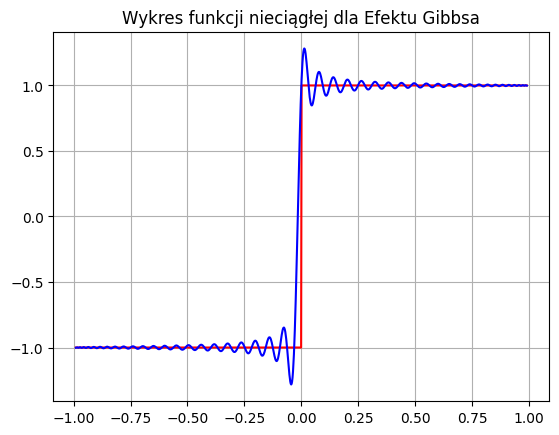

In [13]:
x = np.linspace(-0.99, 0.99, 1000)
y = fn(x)
norm = []

node = main.bar_czeb_weights(100)
x_node = main.chebyshev_nodes(100)
y_node = fn(x_node)

W = main.barycentric_inte(x_node, y_node, node, x)
norm.append(main.L_inf(y, W))

print(f"Minimalny błąd niezależny od rzędu wynosi {norm}")

plt.plot(x, y, "r")
plt.plot(x, W, "b")
plt.title("Wykres funkcji nieciągłej dla Efektu Gibbsa")
plt.grid()
plt.show()



Różnice wynikają z tego, że funkcje parzyste i nieparzyste mają różną strukturę składników szeregów Fouriera. Składniki kosinusowe dla funkcji parzystych eliminują składniki sinusoidalne, a składniki sinusoidalne dla funkcji nieparzystych eliminują składniki kosinusowe. W związku z tym, minimalne błędy niezależne od rzędu będą zależały od charakterystyki funkcji oraz tego, które składniki szeregów dominują w danym przypadku.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)